# Домашнее задание "Продвинутая линейная алгебра".

### Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!


In [1]:
import numpy as np

**a) Диагональная, ортогональная, но не единичная(!)**

Ортогональной является квадратная матрица A с вещественными элементами, результат умножения которой на транспонированную матрицу равен единичной матрице

In [2]:
A = np.array([[1, 0], [0, -1]])
print(A)
print(f'A * A_transp = \n{np.dot(A, A.T)}\n - единичная матрица')

[[ 1  0]
 [ 0 -1]]
A * A_transp = 
[[1 0]
 [0 1]]
 - единичная матрица


**b) Верхнетреугольная, ортогональная**  
**c) Нижнетреугольная, ортогональная**  

т.к. треугольной считается квадратная матрица, у которой все элементы, стоящие ниже (или выше) главной диагонали, равны нулю, то диагональная матрица соответствует определению и может быть приведена в качестве ответа на эти 2 пункта

In [3]:
A = np.diag([1, -1, 1, -1])
print(A)
print(f'A * A_transp = \n{np.dot(A, A.T)}\n - единичная матрица')

[[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0  1  0]
 [ 0  0  0 -1]]
A * A_transp = 
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
 - единичная матрица


Скорее всего, привести пример с треугольной матрицей, у которой соответствующий треугольник помимо главной диагонали так же заполнен ненулевыми вещественными числами, невозможно. Для простых матриц размерами 2\*2, 3\*3 можно показать это, расписав произведение матрицы с произвольными элементами на эту же матрицу транспонированную. Предполагаю, что это справедливо и для более сложных матриц

**d) Матрица, у которой определитель = 1, и все элементы не равны 0**

In [4]:
A = np.array([[2, 1], [7, 4]])
print(A)
print()
print(f'det(A) = {round(np.linalg.det(A), 2)}')

[[2 1]
 [7 4]]

det(A) = 1.0


In [5]:
A = np.array([[1, 1, 1], [1, 2, 1], [1, 1, 2]])
print(A)
print()
print(f'det(A) = {round(np.linalg.det(A), 2)}')

[[1 1 1]
 [1 2 1]
 [1 1 2]]

det(A) = 1.0


**Найдите собственные значения и собственные вектора матриц:**

```
m = np.array([[2, 2],
              [1, 3]])
print(m)
```

In [6]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [7]:
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 4.0
соответствующий ему собственный вектор [-0.70710678 -0.70710678]


### Уровень 1:


**Найдите спектральное разложение матрицы:**

```
m = np.array([[1, 2],
              [2,3]])
print(m)
```


In [8]:
m = np.array([[1, 2],
              [2, 3]])
print(m)

[[1 2]
 [2 3]]


Матрица m симметрична. Можем применить к ней спектральное разложение.  
Найдем собственные значения и собственные вектора

In [9]:
w, v = np.linalg.eig(m)

In [19]:
# Получили компоненты спектрального разложения

print(v, np.diag(w), v.T, sep='\n\n')

[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]

[[-0.23606798  0.        ]
 [ 0.          4.23606798]]

[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]


In [20]:
# убедимся, что их произведение это исходная матрица
v.dot(np.diag(w).dot(v.T))

array([[1., 2.],
       [2., 3.]])

**Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA.** В качестве метрики различия предлагаю использовать MSE.*




In [78]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import pandas as pd


In [27]:
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

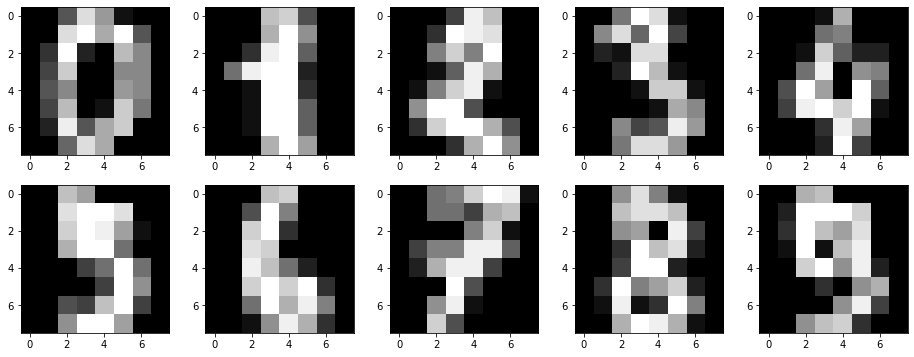

In [62]:
# визуализируем примеры данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_digits[i,:].reshape([8,8]),cmap = 'gray')

In [77]:
# Рассмотрим работу PCA при конкретном значении n_components. Пусть n_components будет равным 10
pca=PCA(10)
pca.fit(X_digits)
X_proj = pca.transform(X_digits)
X_pred = pca.inverse_transform(X_proj)
print(f'mse: {mean_squared_error(X_pred, X_digits)}')
print(f'explained variance: {round(np.sum(pca.explained_variance_ratio_)*100, 2)}')

mse: 4.914301555993299
explained variance: 73.82


Получили, что полученными 10ю признаками из 64 объяснены 73,82% исходной дисперсии, достаточно много. Для того, чтобы оценить, насколько велика или мала среднеквадратическая ошибка при данном количестве компонент, необходимо сравнить этот показатель с таким же при другом количестве компонент.

Т.к. каждый объект представлен набором из 64 чисел, рассмотрим случаи, когда количество компонент изменяется от 1 до 64

In [79]:
results = pd.DataFrame(columns=['n_components', 'mse', 'exp_variance'])
for i in range (1, X_digits.shape[1]+1):
    pca = PCA(n_components=i, random_state=146)
    pca.fit(X_digits)
    X_proj = pca.transform(X_digits)
    X_pred = pca.inverse_transform(X_proj)
    results.loc[i-1] = [i, mean_squared_error(X_pred, X_digits), round(np.sum(pca.explained_variance_ratio_)*100, 2)]


In [80]:
results.head(10)

,n_components,mse,exp_variance
0,1.0,15.977678,14.89
1,2.0,13.421012,28.51
2,3.0,11.206801,40.30
3,4.0,9.627986,48.71
4,5.0,8.542448,54.50
5,6.0,7.619391,59.41
6,7.0,6.809152,63.73
7,8.0,6.121800,67.39
8,9.0,5.492291,70.74
9,10.0,4.914298,73.82


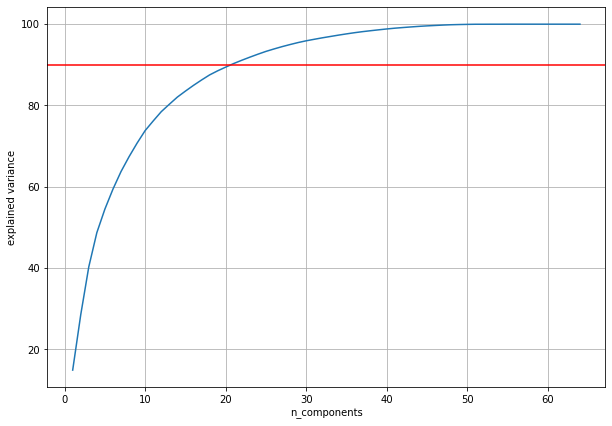

In [89]:
# зависимость объясненной дисперсии от количества компонент. Визуализация
plt.figure(figsize=(10, 7))
plt.plot(results.n_components, results.exp_variance)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained variance')

plt.axhline(90, c='r') #90% объясненной дисперсии

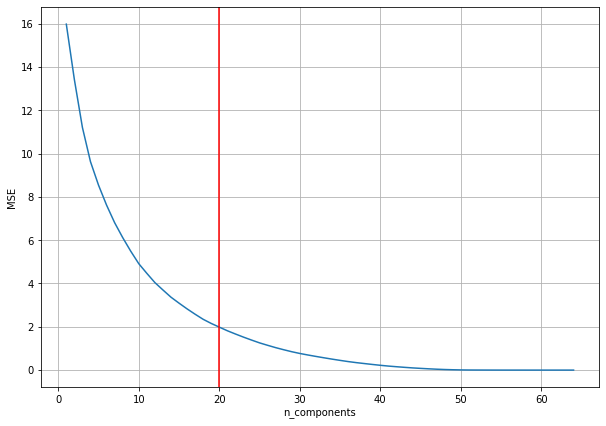

In [90]:
# зависимость mse от количества компонент. Визуализация
plt.figure(figsize=(10, 7))
plt.plot(results.n_components, results.mse)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('MSE')

plt.axvline(20, c='r') # n=20

В отдельных статьях мне встречалось мнение, что на практике оставляют столько компонент, сколько обеспечит хотя бы 90% объяснения исходной дисперсии. В нашем случае это будет n = 20 или 21. Т.е. мы сможем сократить размерность более, чем в 3 раза, сохранив большую часть разнообразия данных. Срекднеквадратичная ошибка при n = 20 составит примерно 2  


--------------------------------------------------------------------------------

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации.
Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - Документация по PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html - Документация по MSE

Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
